# Case: Fatores que impactam o salário de profissionais
> **Aluno:** Lucas Tiago de Oliveira

> **Turma:** LAAIA1

## Considere os dados de 534 profissionais, seus salários e algumas informações sociodemográficas. A ideia é tentar entender os fatores que mais influenciam na possibilidade do profissional ganhar um salário superior a 10 s.m. (salários mínimos).

**Campos existentes na base de dados**						
- IDADE - Idade do profissional em anos;						
- EDUCACAO - Anos de estudo;						
- SEXO  - Sexo do profissional (0=Masculino, 1=Feminino);						
- SUL - Se a empresa que o profissional trabalha fica localizada na região SUL do município de São Paulo;
- ANOS_EXPERIENCIA - Tempo de experiência do profissional;
- SALARIO - Salário do profissional (salários mínimos);						
- FLAG_CASADO - Se o profissional é casado ou não.

In [45]:
setwd(getwd())
library(readxl)
library(pastecs)
salario = read_excel("../input/fatores-impacto-salario/CasoUso_03_Fatores_Impacto_Salario.xlsx", sheet = "BASE DE DADOS")
head(salario)

EDUCACAO,SUL,SEXO,ANOS_EXPERIENCIA,SALARIO,IDADE,FLAG_CASADO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,1,21,5.10,35,1
9,0,1,42,4.95,57,1
12,0,0,1,6.67,19,0
12,0,0,4,4.00,22,0
12,0,0,17,7.50,35,1
13,0,0,9,13.07,28,0


### a)Faça uma exploração dos dados envolvidos nessa base

Para iniciarmos precimos averiguar a distribuição dos dados fornecidos, para isso utilizamos a função _summary_ para verificarmos o resumo estatítico dos dados.

In [46]:
summary(salario)

    EDUCACAO          SUL              SEXO        ANOS_EXPERIENCIA
 Min.   : 2.00   Min.   :0.0000   Min.   :0.0000   Min.   : 0.00   
 1st Qu.:12.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 8.00   
 Median :12.00   Median :0.0000   Median :0.0000   Median :15.00   
 Mean   :13.02   Mean   :0.2921   Mean   :0.4588   Mean   :17.82   
 3rd Qu.:15.00   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:26.00   
 Max.   :18.00   Max.   :1.0000   Max.   :1.0000   Max.   :55.00   
    SALARIO           IDADE        FLAG_CASADO    
 Min.   : 1.000   Min.   :18.00   Min.   :0.0000  
 1st Qu.: 5.250   1st Qu.:28.00   1st Qu.:0.0000  
 Median : 7.780   Median :35.00   Median :1.0000  
 Mean   : 9.024   Mean   :36.83   Mean   :0.6554  
 3rd Qu.:11.250   3rd Qu.:44.00   3rd Qu.:1.0000  
 Max.   :44.500   Max.   :64.00   Max.   :1.0000  

Com isso podemos realizar algumas contestações:
- **EDUCACAO:** Temos uma distribuição assimétrica à direta (média > mediana);
- **SUL:** Temos uma maior concentração de trabalhadore que trabalham em empresas que não estão instaladas no sul de São Paulo (média < 0.5);
- **SEXO:** Temos 54,15% dos profissionais são homens;
- **ANOS_EXPERIENCIA:** Dados com ligeira assimetria à direita (média > mediana), com média de experiência dos participantes é 17.82;
- **SALARIO:** Dados com ligeira assimetria à direita (média > mediana);
- **IDADE:** Dados com ligeira assimetria à direita (média > mediana);
- **FLAG_CASADO:** Temos 65,54% dos participantes são casados.

Vamos averiguar com mais precisão as variáveis categóricas utilizando as tabelas de frequência.

In [47]:
library(summarytools)

,Frequency,Percent
0,378,70.79
1,156,29.21
Total,534,100.00


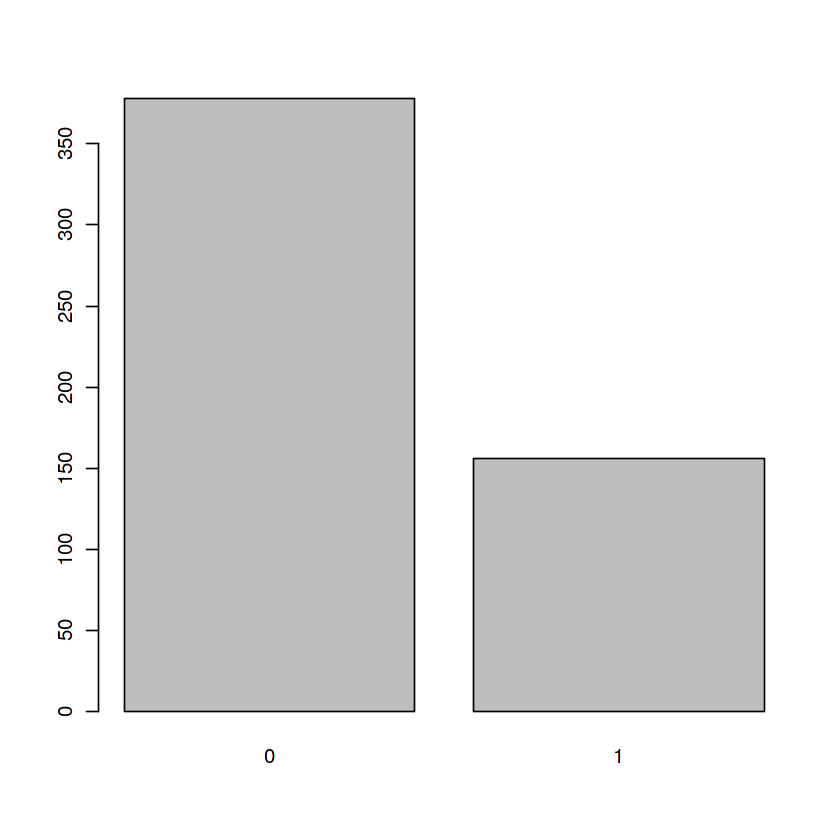

In [48]:
#Variável SUL
round(freq(salario$SUL),2)

,Frequency,Percent
0,289,54.12
1,245,45.88
Total,534,100.00


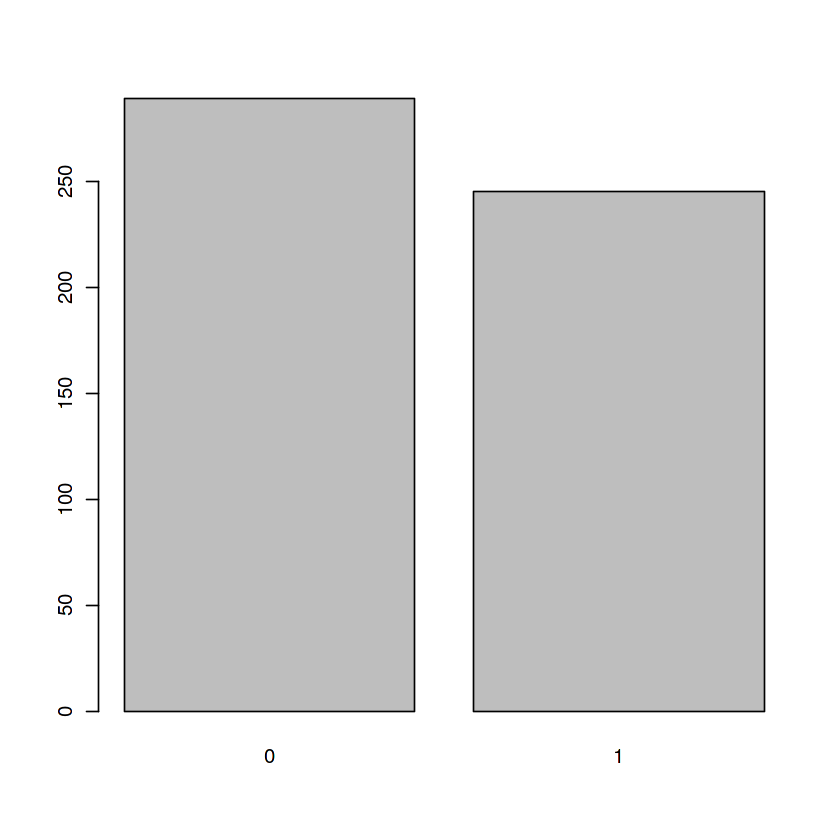

In [49]:
#Variável SEXO
round(freq(salario$SEXO),2)

,Frequency,Percent
0,184,34.46
1,350,65.54
Total,534,100.00


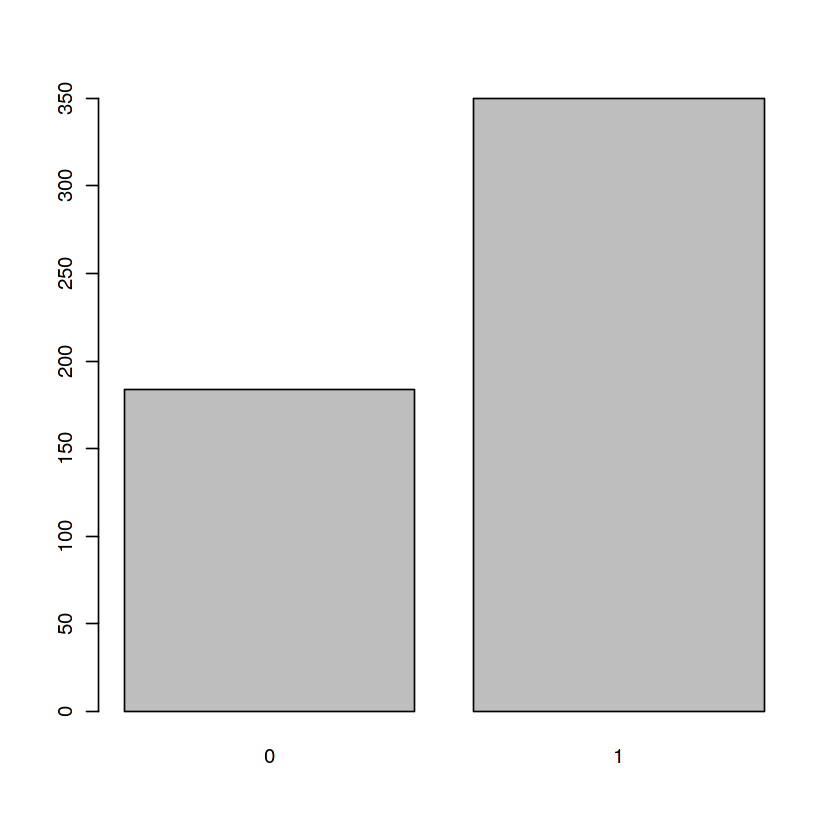

In [50]:
#Variável FLAG_CASADO
round(freq(salario$FLAG_CASADO),2)

Nas tabelas acima podemos verificar as participação nos dados de cada categoria.

### b)Há algum outlier que mereça sua atenção? E com relação a dados faltantes? 

Para verificarmos os *outiliers* iremos utilizar um gráfico *bloxplot*.

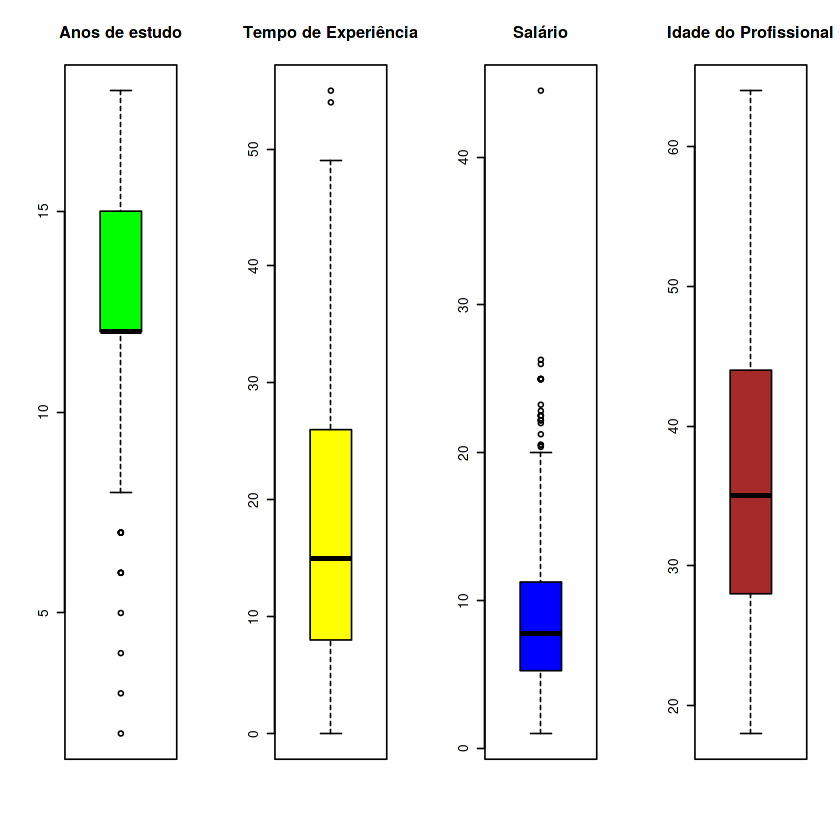

In [51]:
par(mfrow = c(1,4))
boxplot(salario$EDUCACAO, col="green", main="Anos de estudo")
boxplot(salario$ANOS_EXPERIENCIA, col="yellow", main="Tempo de Experiência")
boxplot(salario$SALARIO, col="blue", main="Salário")
boxplot(salario$IDADE, col="brown", main="Idade do Profissional")

**Nos precisamos nos preocupar com os outiliers das variáveis EDUCAÇÃO, ANOS_EXPERIÊNCIA E SALÁRIO**
Podemos observar que as variáveis EDUCACAO E SALÁRIO tem uma boa quantidade de *outiliers*, nos limites inferiores e superiores, respectivamente. Todavia, a variável ANOS_EXPERIENCIA, observou-se somente 2 dados outiliers que provavelmente podem não causar grandes problemas para a análise.

**Quantidade de dados *missing***.

In [52]:
sum(is.na(salario))

[1] 0

**Não temos dados faltantes no banco de dados.**

### c)Qual o % de pessoas na situação de interesse?

**Conforme pode ser observado da tabela abaixo temos que 31,09% dos profissionais recebem mais de 10 salários mínimos.**

,Frequency,Percent
0,368,68.91
1,166,31.09
Total,534,100.00


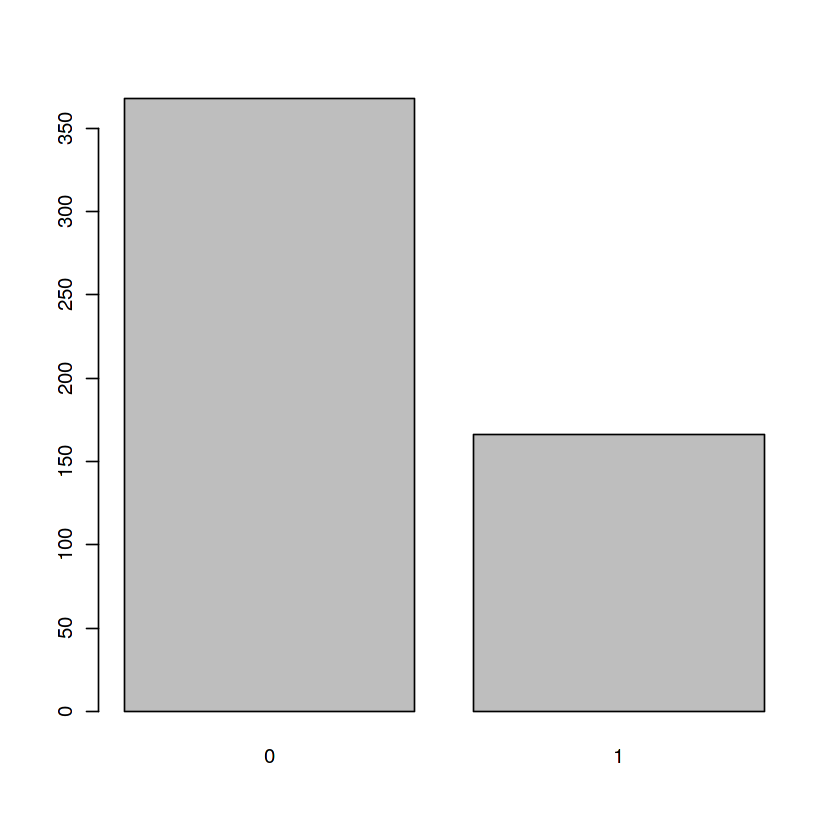

In [53]:
round(freq(ifelse(salario$SALARIO>10,1,0)),2)

### d)Qual a correlação entre as variáveis presentes na base?	

In [54]:
salario$over10<-ifelse(salario$SALARIO>10,1,0)
round(cor(salario[,c(-2, -3,-7,-8)]),2)

,EDUCACAO,ANOS_EXPERIENCIA,SALARIO,IDADE
EDUCACAO,1.00,-0.35,0.38,-0.15
ANOS_EXPERIENCIA,-0.35,1.00,0.09,0.98
SALARIO,0.38,0.09,1.00,0.18
IDADE,-0.15,0.98,0.18,1.00


### e)Quais são as variáveis que melhor explicam se o profissional ganha ou não mais de 10 s.m.?

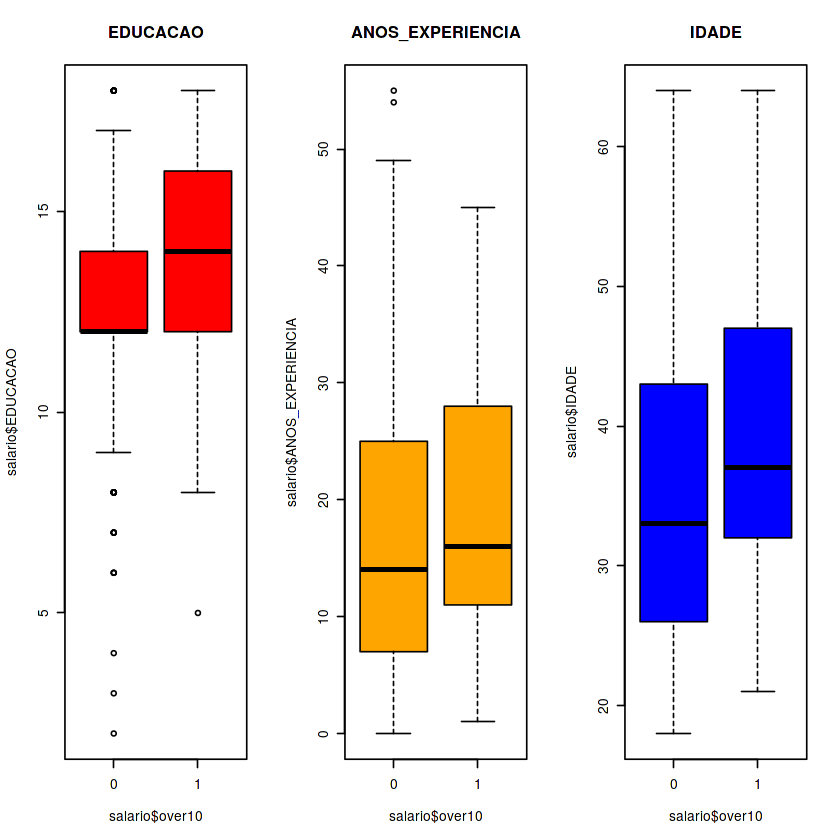

In [55]:
#Variáveis Explicativas Quantitativas
par(mfrow=c(1,3))
boxplot(salario$EDUCACAO ~salario$over10, col="red",main="EDUCACAO")
boxplot(salario$ANOS_EXPERIENCIA ~salario$over10, col="orange",main="ANOS_EXPERIENCIA")
boxplot(salario$IDADE ~salario$over10, col="blue",main="IDADE")

In [56]:
#Variáveis Explicativas Qualitativas
library(descr)
print("Salário acima 10 S.M. vs. Sul")
CrossTable(salario$over10, salario$SUL,prop.r=TRUE, prop.c=FALSE, prop.t = FALSE, prop.chisq = FALSE)
CrossTable(salario$over10, salario$SEXO,prop.r=TRUE, prop.c=FALSE, prop.t = FALSE, prop.chisq = FALSE)
CrossTable(salario$over10, salario$FLAG_CASADO,prop.r=TRUE, prop.c=FALSE, prop.t = FALSE, prop.chisq = FALSE)

[1] "Salário acima 10 S.M. vs. Sul"


   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  salario$SUL
salario$over10        0       1   Total
---------------------------------------
0                   248     120     368
                  0.674   0.326   0.689
---------------------------------------
1                   130      36     166
                  0.783   0.217   0.311
---------------------------------------
Total               378     156     534

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  salario$SEXO
salario$over10        0       1   Total
---------------------------------------
0                   178     190     368
                  0.484   0.516   0.689
---------------------------------------
1                   111      55     166
                  0.669   0.331   0.311
---------------------------------------
Total               289     245     534

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  salario$FLAG_CASADO
salario$over10        0       1   Total
---------------------------------------
0                   140     228     368
                  0.380   0.620   0.689
---------------------------------------
1                    44     122     166
                  0.265   0.735   0.311
---------------------------------------
Total               184     350     534

**Podemos ver que as variáveis como podemos ver nos gráficos boxplot as variáveis IDADE E EDUCAÇÃO tem uma boa relação com os salários acima de 10 S.M.. As demais demais não apresentam uma relação muito forte com a mesma, pois elas conseguem tem um bom acerto somente em uma condição (0 ou 1).**

### f) Ajuste um modelo logístico e avalie quais variáveis apareceram como significantes e quais não. Adote 10% de significância.

In [57]:
#Modelo com todas as variáveis
model = glm(over10 ~ EDUCACAO+
                    SUL+
                    SEXO+
                    ANOS_EXPERIENCIA+
                    IDADE+
                    FLAG_CASADO
                    ,family=binomial(link = "logit"),
                    data=salario)
summary(model)


Call:
glm(formula = over10 ~ EDUCACAO + SUL + SEXO + ANOS_EXPERIENCIA + 
    IDADE + FLAG_CASADO, family = binomial(link = "logit"), data = salario)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2817  -0.7793  -0.4810   0.8594   2.3664  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -25.3856   803.1172  -0.032    0.975    
EDUCACAO          -2.6461   133.8528  -0.020    0.984    
SUL               -0.3638     0.2471  -1.472    0.141    
SEXO              -1.0093     0.2216  -4.555 5.24e-06 ***
ANOS_EXPERIENCIA  -3.0154   133.8528  -0.023    0.982    
IDADE              3.0648   133.8528   0.023    0.982    
FLAG_CASADO        0.3561     0.2376   1.499    0.134    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 661.93  on 533  degrees of freedom
Residual deviance: 537.73  on 527  degrees of freedom
AIC: 551.73

Number of 

In [58]:
#Modelo retirando a variável ANOS DE EXPERIENCIA
model = glm(over10 ~ SUL+
                    EDUCACAO+
                    SEXO+
                    #ANOS_EXPERIENCIA+
                    IDADE+
                    FLAG_CASADO
                    ,family=binomial(link = "logit"),
                    data=salario)
summary(model)


Call:
glm(formula = over10 ~ SUL + EDUCACAO + SEXO + IDADE + FLAG_CASADO, 
    family = binomial(link = "logit"), data = salario)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2839  -0.7765  -0.4834   0.8598   2.3619  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.30365    0.81276  -8.986  < 2e-16 ***
SUL         -0.36146    0.24715  -1.463    0.144    
EDUCACAO     0.36897    0.04617   7.991 1.34e-15 ***
SEXO        -1.01525    0.22143  -4.585 4.54e-06 ***
IDADE        0.04970    0.01004   4.951 7.37e-07 ***
FLAG_CASADO  0.36087    0.23758   1.519    0.129    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 661.93  on 533  degrees of freedom
Residual deviance: 538.13  on 528  degrees of freedom
AIC: 550.13

Number of Fisher Scoring iterations: 4


In [59]:
#Modelo retirando a variável SUL
model = glm(over10 ~ SEXO+
                    EDUCACAO+
                    #SUL+
                    #ANOS_EXPERIENCIA+
                    IDADE+
                    FLAG_CASADO
                    ,family=binomial(link = "logit"),
                    data=salario)
summary(model)


Call:
glm(formula = over10 ~ SEXO + EDUCACAO + IDADE + FLAG_CASADO, 
    family = binomial(link = "logit"), data = salario)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2624  -0.7634  -0.5038   0.8816   2.2738  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.52079    0.80201  -9.377  < 2e-16 ***
SEXO        -1.00632    0.22080  -4.558 5.17e-06 ***
EDUCACAO     0.37572    0.04586   8.192 2.57e-16 ***
IDADE        0.05059    0.01002   5.047 4.49e-07 ***
FLAG_CASADO  0.35309    0.23717   1.489    0.137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 661.93  on 533  degrees of freedom
Residual deviance: 540.31  on 529  degrees of freedom
AIC: 550.31

Number of Fisher Scoring iterations: 4


In [60]:
#Modelo retirando a variável FLAG_CASADO
model = glm(over10 ~ SEXO+
                    EDUCACAO+
                    #SUL+
                    #ANOS_EXPERIENCIA+
                    IDADE
                    #FLAG_CASADO
                    ,family=binomial(link = "logit"),
                    data=salario)
summary(model)


Call:
glm(formula = over10 ~ SEXO + EDUCACAO + IDADE, family = binomial(link = "logit"), 
    data = salario)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2467  -0.7706  -0.4988   0.8896   2.2915  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.422544   0.796772  -9.316  < 2e-16 ***
SEXO        -1.013688   0.220639  -4.594 4.34e-06 ***
EDUCACAO     0.375513   0.045768   8.205 2.31e-16 ***
IDADE        0.054448   0.009698   5.614 1.97e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 661.93  on 533  degrees of freedom
Residual deviance: 542.55  on 530  degrees of freedom
AIC: 550.55

Number of Fisher Scoring iterations: 4


Para com 90% de confiança podemos dizer que o modelo de classificação com as variaveis EDUCACAO, SEXO E ANOS_EXPERIENCIA, explicam o nosso modelo de regressão logística.

### g)Calcule o score de propensão a ganhar > 10 s.m. como uma coluna nova na base.

In [61]:
salario$score<-predict(model, newdata=salario, type="response")
head(salario)

EDUCACAO,SUL,SEXO,ANOS_EXPERIENCIA,SALARIO,IDADE,FLAG_CASADO,over10,score
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,1,21,5.10,35,1,0,0.02856932
9,0,1,42,4.95,57,1,0,0.12422020
12,0,0,1,6.67,19,0,0,0.13217400
12,0,0,4,4.00,22,0,0,0.15206102
12,0,0,17,7.50,35,1,0,0.26684336
13,0,0,9,13.07,28,0,1,0.26574412


__Segue acima uma demostração da tabela com as predicões__

### h)Qual a sugestão inicial de ponto de corte para predizer se a pessoa ganhará ou não mais de 10 s.m.?


Minha sugestão seria utilizar um ponto de corte igual a média da variável _over10_, ou seja, 0,3109.

In [62]:
mean(salario$over10)

[1] 0.3108614

### i)Considerando essa sugestão, desenhe a matriz de confusão e qual a taxa de classificação correta?

In [63]:
library(descr)
salario$predito = ifelse(salario$score>0.310861423220974,1,0)
CrossTable(salario$over10, salario$predito,prop.r=TRUE, prop.c=FALSE, prop.t = FALSE, prop.chisq = FALSE)

   Cell Contents 
|-------------------------|
|                       N | 
|           N / Row Total | 
|-------------------------|

                  salario$predito
salario$over10        0       1   Total
---------------------------------------
0                   269      99     368
                  0.731   0.269   0.689
---------------------------------------
1                    57     109     166
                  0.343   0.657   0.311
---------------------------------------
Total               326     208     534

### j) Que coisas úteis poderíamos fazer se entendermos o que leva uma pessoa a ter mais chances de ganhar > 10 s.m.?

Ao verificamos o modelo de classificação utilizando regressão logística, podemos verificar que os colaboradores que tem uma educação maior tem uma probabilidade maior a ter um salário acima de 10 salários mínimos. Pensando neste sentido, podemos concluir que quanto mais tempo nos qualificarmos maior a probabilidade de ter um salário alto. Outra conclusão é que com o passar do tempo, conforme ficamos mais velhos a probabilidade de termos um sálário maior aumenta.
